<h2 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Métodos Numericos, Taller 3</span></h2>

<h1 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Solución de ecuaciones no lineales</span></h1>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Universidad del Valle, Departamento de f&iacute;sica, Cali, Colombia</span></p>

<h3 style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Miguel &Aacute;ngel Jaramillo Quengu&aacute;n</span></h3>

<p style="text-align:center"><span style="font-family:Times New Roman,Times,serif">Codigo: 2070763</span></p>

<p style="text-align:center"><span style="font-family:Courier New,Courier,monospace"><a href="mailto:miguel.quenguan@correounivalle.edu.co">miguel.quenguan@correounivalle.edu.co</a></span></p>

<p style="text-align:center">Presentado a Miguel Angel Vargas</p>

In [2]:
#importando paquetes
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from numpy.ma.core import size

sns.set_theme(style="darkgrid")

# Ejercicio 1: Situación problema (solucion de ecuación no Lineal)

Considere la siguiente situacion problema, teniendo en cuenta la ecuación de estado de van der Walls:

$$ (P+\frac{a}{\bar{V}^2})(\bar{V}-b)=RT \ \ \ \ \ \ \ \ \ (1)$$ 

Se debe calcular el columen específico de V de dioxido de carbono a temperatura de $T=300 K$, dado $P=1.0$atm, $R=0.082054 \frac{J}{Kg\cdot K}, a=3.592 Pa\cdot \frac{m^6}{Kg^2}, b=0.042627 \frac{m^3}{Kg}$

**a.** Determine la funcíon a la cual se le debe calcular la primera raiz positiva para solucionar el problema.

**b.** Grafique la función en un dominio de los reales positivos de modo que se visualice la primera raiz positiva.

## **a.** determinando la función para calcular la solucion del problema.

Desde la ecuacion (1) igualando a 0 obtenemos la exprecion:

$$(P+\frac{a}{\bar{V}^2})(\bar{V}-b)-RT=0$$

Por esto definimos la funcion $f(V)$ como:

$$f(V)=(P+\frac{a}{\bar{V}^2})(\bar{V}-b)-RT$$

La solucion de la ecuacion tendra lugar para $f(V)=0$

## graficando la función (f(V))

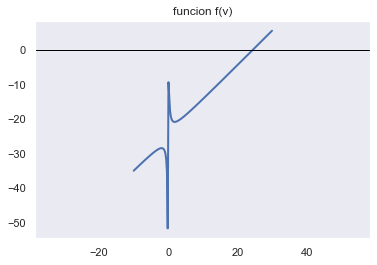

In [3]:
def SEvw(T,P,V,a,b): # definimos la ecuacion de estado de van der walls
    f=(P + a/(V**2))*(V-b)-0.082054*T
    return f

# evaluamos las condiciones de nuestro problema especifico
T=300.0
P=1.0
a=3.592
b=0.04267
V=np.linspace(-10,30,180)
fv=SEvw(T,P,V,a,b)
plt.plot(V,fv,linewidth=2.0)
plt.axis('equal')
plt.grid()
plt.title('funcion f(v)')
plt.axhline(y=0, c="black", linewidth=1.0)
plt.show()    

# Ejercicio 2: Método de Biseccion

Presente una breve explicación teórica del metodo de la Biseccion y desarrolle un código en python que implemente el método para solucionar el problema del ejercicio 1 y cumpla con:

**a.** Usted puede elegir libremente el intervalo inicial

**b.** Las condiciones de parada son: obtener un error absoluto de las aproximaciones sucesivas menor a $10^{-6}$ o realizar 100 iteraciones.

**c.** Debe imprimir cada una de las aproximaciones de la ráizobtenidas en cada paso.

**d.** Debe guardar en una lista todos los errores absolutos en las iteraciones

### metodo de la bisección

Para el metodo es necesario que la funcion tenga un cambio de signo en un intervalo conocido $[a,b]$, dada la funcion $f$ continua esta debe ser cero en algun punto dentro del intervalo (bracket).

El metodo de la biseccion empieza con un bracket inicial y sucesivamente reduce su longitud hasta que la solucion a sido aislada con la precision deseada. En cada iteracion para aislar el bracket la funcion es evaluada en el punto medio del intervalo actual y una mitad del intervalo puede ser descartada, dependiendo del signo del valor de la función en el punto medio esta es la condicion para que el nuevo intervalo contenga a la solución. La expresion para el punto medio del intervalo $(c)$ esta dada por: $c=\frac{a+b}{2}$

este metodo es un metodo de acotamiento de la funcion por tanto no se encuentra la solucion exacta, si no que tenemos un intervalo suficientemente pequeño $(|| a-b ||<\epsilon : \epsilon>0 )$ donde esta la solucion. 

In [4]:
def prlm(V): # reducimos los parametros de la ecuacion general
    f=(1 + 3.592/(V**2))*(V-0.04267)-0.082054*300
    return f

In [5]:
# metodo de la biseccion
def MB(f,a,b,Tol): #la funcion de metodo de biseccion tiene como input una funcion f, un intervalo a,b y una tolerancia Tol
    tol_list=[]
    k=1
    it=0
    sols=[]
    tol=np.abs(a-b)/2**k
    x1,x2=a,b
    while Tol<tol and it<100:
        it+=1
        tol=np.abs(x1-x2)/2**k
        tol_list.append(tol)
        k=k+1

        if f(a)*f(b)<0: #condicion para que el intervalo inicial contenga la solucion del sistema
            x12=(x1+x2)/2
            y1,y2,y12=f(x1),f(x2),f(x12)
            sols.append(x12)
            if y1*y12<0:# condicion para que el punto medio contenga la solucion
                x2=x12 # re evaluando los limites del bracket
            else:
                x1=x12
        else:
            print(f'La ecuacion no tiene solucion en el intervalo') 
            break
    
    return x1,x2,tol_list,sols

In [6]:
mba,mbb,ErrMB,SolMB=MB(prlm,20,30,10.0**-6)
print(f' lista de error:{ErrMB}\n \n lista de aproximaciones:{SolMB}')


 lista de error:[5.0, 1.25, 0.3125, 0.078125, 0.01953125, 0.0048828125, 0.001220703125, 0.00030517578125, 7.62939453125e-05, 1.9073486328125e-05, 4.76837158203125e-06, 1.1920928955078125e-06, 2.980232238769531e-07]
 
 lista de aproximaciones:[25.0, 22.5, 23.75, 24.375, 24.6875, 24.53125, 24.453125, 24.4921875, 24.51171875, 24.521484375, 24.5166015625, 24.51416015625, 24.512939453125]


# Ejercicio 3: Método de la regla falsa.
Realizar el trabajo del ejercicio 2, pero esta vez para el metodo de regla falsa.

para este metodo planteamos una recta secante a la funcion a solucionar, de forma que obteniendo el intercepto con el eje x de esta recta sera la siguiente aproximacion para la raiz de la funcion $f$ este intercepto $(c)$ tiene la siguiente expresion:

$$c=b-f(b)\frac{a-b}{f(a)-f(b)}$$

In [7]:
def prlm(V): # reducimos los parametros de la ecuacion general
    f=(1 + 3.592/(V**2))*(V-0.04267)-0.082054*300
    return f

In [8]:
# metodo de la regla falsa
def RF(f,a,b,Tol): #la funcion de metodo de biseccion tiene como input una funcion f, un intervalo a,b y una tolerancia Tol
    
    tol_list=[]
    it=0
    sols=[a,b]
    tol=np.abs(a-b)
    x1,x2=a,b

    while Tol<tol and it<100:
        tol=np.abs(sols[it+1]-sols[it])
        it+=1
        tol_list.append(tol)

        if f(a)*f(b)<0: #condicion para que el intervalo inicial contenga la solucion del sistema
            x12=x2-f(x2)*((x1-x2)/(f(x1)-f(x2)))
            y1,y2,y12=f(x1),f(x2),f(x12)
            sols.append(x12)
            if y1*y12<0:# condicion para que el punto medio contenga la solucion
                x2=x12 # re evaluando los limites del bracket
            else:
                x1=x12
        else:
            print(f'La ecuacion no tiene solucion en el intervalo') 
            break
    
    return x1,x2,tol_list,sols

In [9]:
rfa,rfb,ErrRF,SolRF=RF(prlm,20,30,10.0**-6)
print(f' lista de error:{ErrRF}\n \n lista de aproximaciones:{SolRF}')


 lista de error:[10, 5.493463625598903, 0.0060451352596970764, 6.611543561518829e-06, 7.229232323879842e-09]
 
 lista de aproximaciones:[20, 30, 24.506536374401097, 24.512581509660794, 24.512588121204356, 24.51258812843359, 24.512588128441493]


# Ejercicio 4: método de newton-Raphson.

El requirimiento princpal de este metodo es que debe ser diferenciable. en este caso solo necesitamos un punto de la funcion de forma tal que este cerca al punto de corte, en este punto planteamos una recta tangente al punto el intercepto de esta recta tangente sera nuestra nueva aproximacion de la solucion, de forma tal que esta nueva aproximacion tiene la forma:

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

In [10]:
def prlm(V): 
    f=(1 + 3.592/(V**2))*(V-0.04267)-0.082054*300
    return f

In [11]:
#definimos la derivada de la funcion problema
def Dprlm(V):
    f=1-(7.184*(-0.04267+V))/V**3+3.592/V**2
    return f


In [12]:
def NR(f,Df,x0,Err):
    
    Err_list=[]
    it=0
    sols=[0,x0]
    err=np.abs(x0)
    x1,x2=a,b

    while Err<err and it<100:
        err=np.abs(sols[it+1]-sols[it])
        Err_list.append(err)
        it+=1
        x=sols[it]-(f(sols[it])/Df(sols[it]))
        sols.append(x)

    sols.remove(0)
    del Err_list[0]
    return x0,Err_list,sols

In [13]:
nr0,ErrNR,SolNR=NR(prlm,Dprlm,20,10.0**-6)
print(f' lista de error:{ErrNR}\n \n lista de aproximaciones:{SolNR}')

 lista de error:[4.520070208559435, 0.007482066463666115, 1.3654268826712723e-08]
 
 lista de aproximaciones:[20, 24.520070208559435, 24.51258814209577, 24.5125881284415, 24.5125881284415]


# Ejercicio 5: método de la secante 

En este metodo encontramos una secante a la funcion y el intercepto de esta secante con el eje x sera una aproximacion de nuestra solucion. de forma que cada aproximacion tiene la forma: 

$$x_{n+1}=x_n-\frac{f(x_n)(x_{n-1}-x_{n})}{f(x_{n-1})-f(x_n)}$$

In [14]:
def SC(f,x0,x1,Err):
    
    Err_list=[]
    it=0
    sols=[x0,x1]
    err=np.abs(x0-x1)
    x1,x2=a,b

    while Err<err and it<100:
        err=np.abs(sols[it+1]-sols[it])
        Err_list.append(err)
        x=sols[it+1]-(f(sols[it+1])*(sols[it]-sols[it+1])/(f(sols[it])-f(sols[it+1])))
        it+=1
        sols.append(x)

    
    return x0,x1,Err_list,sols

In [15]:
sca,scb,ErrSc,SolSc=SC(prlm,20,27,10.0**-6)
print(f' lista de error:{ErrSc}\n \n lista de aproximaciones:{SolSc}')

 lista de error:[7, 2.4904614451744003, 0.003047893315375916, 1.6803017750532945e-06, 1.2505552149377763e-12]
 
 lista de aproximaciones:[20, 27, 24.5095385548256, 24.512586448140976, 24.51258812844275, 24.5125881284415, 24.5125881284415]


# Ejercicio 6 comparación y analisis de resultados


In [16]:
dicSol={'aproximacion Bisección': SolMB,
     'aproximacion Regla Falsa': SolRF,
     'aproximacion Newton-Raphson': SolNR,
     'aproximacion Secante': SolSc,
}

soluciones=pd.DataFrame.from_dict(dicSol,orient='index').transpose()

In [20]:
soluciones

,aproximacion Bisección,aproximacion Regla Falsa,aproximacion Newton-Raphson,aproximacion Secante
0,25.000000,20.000000,20.000000,20.000000
1,22.500000,30.000000,24.520070,27.000000
2,23.750000,24.506536,24.512588,24.509539
3,24.375000,24.512582,24.512588,24.512586
4,24.687500,24.512588,24.512588,24.512588
5,24.531250,24.512588,NaN,24.512588
6,24.453125,24.512588,NaN,24.512588
7,24.492188,NaN,NaN,NaN
8,24.511719,NaN,NaN,NaN
9,24.521484,NaN,NaN,NaN


<AxesSubplot:title={'center':'Convergencia de aproximacion'}, xlabel='Iteraciones', ylabel='aproximación'>

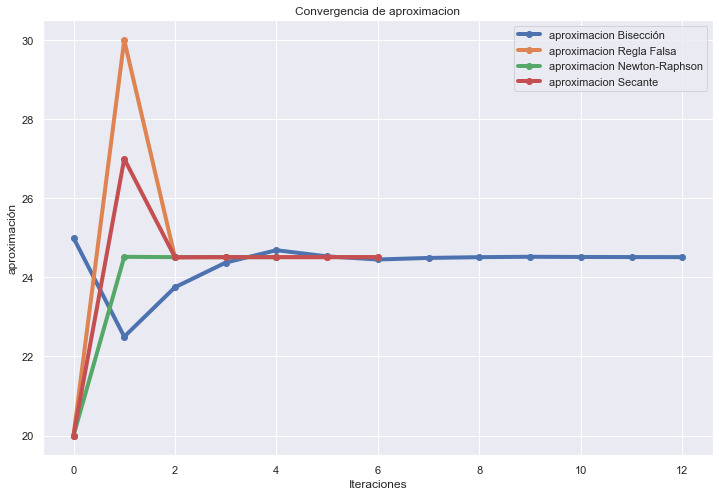

In [21]:
soluciones.plot(style='o-', figsize=(12,8), lw=4, title='Convergencia de aproximacion', xlabel='Iteraciones', ylabel='aproximación')

In [18]:
dicErr={'Error Bisección': ErrMB,
     'Error Regla Falsa': ErrRF,
     'Error Newton-Raphson': ErrNR,
     'Error Secante': ErrSc,
}

errores=pd.DataFrame.from_dict(dicErr,orient='index').transpose()

In [22]:
errores

,Error Bisección,Error Regla Falsa,Error Newton-Raphson,Error Secante
0,5.000000e+00,1.000000e+01,4.520070e+00,7.000000e+00
1,1.250000e+00,5.493464e+00,7.482066e-03,2.490461e+00
2,3.125000e-01,6.045135e-03,1.365427e-08,3.047893e-03
3,7.812500e-02,6.611544e-06,NaN,1.680302e-06
4,1.953125e-02,7.229232e-09,NaN,1.250555e-12
5,4.882812e-03,NaN,NaN,NaN
6,1.220703e-03,NaN,NaN,NaN
7,3.051758e-04,NaN,NaN,NaN
8,7.629395e-05,NaN,NaN,NaN
9,1.907349e-05,NaN,NaN,NaN


<AxesSubplot:title={'center':'Convergencia de error'}, xlabel='Iteraciones', ylabel='Error absoluto'>

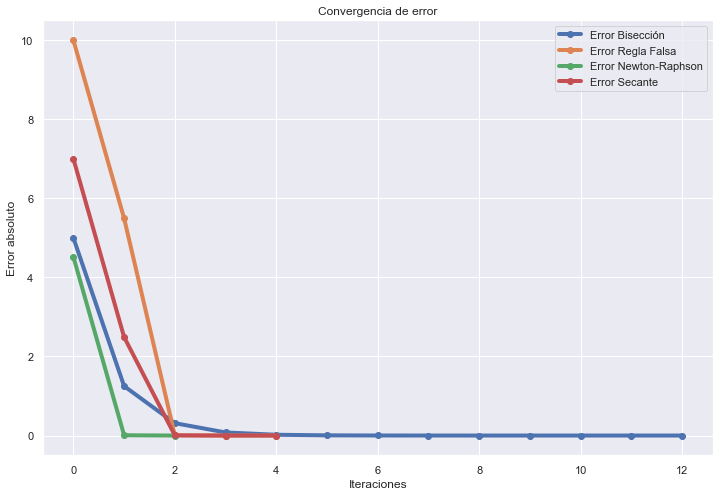

In [23]:
errores.plot(style='o-', figsize=(12,8), lw=4, title='Convergencia de error', xlabel='Iteraciones', ylabel='Error absoluto')

# Conclusiones

Es apreciable en los graficos como el metodo de newton-raphson converge con mayor rapidez, es decir en un numero menor de itraciones. pero es importante destacar la limitacion de este metodo a conocer la derivada de la funcion a solucionar. este hecho no se presenta en los otros metodos, que puede ser que tengan un uso mas apropiado en ciertas ocasiones.

los diversos metodos de soluciones de ecuaciones no lineales se centran en encontrar el intercepto de la funcion incognita y esto se realiza acotando un intervalo o un valor inicial que este cercano a este punto.

Los métodos de Bisección y Regla Falsa requieren determinar cambios de signo de la función usando el teorema de valor intermedio, en ciertos intervalos o determinar en que subintervalo se encuentra la raíz, mientras que los métodos de Newton-Raphson y Secante no lo requieren.

La convergencia de cada uno de los métodos, depende de la función y los puntos iniciales con los que se cuenta, ya que estos son parte fundamental de cada metodo para resolver la ecuacion. 

# Referencias
[1] Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.